# Customer Retention

## import dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Converting excel to csv
read_file = pd.read_excel (r'C:\Users\bhakti.thaker\Desktop\Datatrained\FLIPROBBO\Customer_retention_dataset\customer_retention_dataset.xlsx', sheet_name='codedsheet')
read_file.to_csv (r'customer_retension_dataset.csv', index = None, header=True)
data = pd.read_csv('customer_retension_dataset.csv')

In [4]:
data

1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
..                     ...                  ...   
264                      1                    2   
265                      1                    3   
266                      1                    4   
267                      1                    1   
268                      1                    4   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

     5 Since How Long You are Shopping Online ?  \
0                                             5   
1                                             5   
2                                             4   
3                                             4   
4                                             3   
..                                          ...   
264                                           2   
265                                           2   
266                                           3   
267                                           3   
268                                           3   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    4                       
1                                                    5                       
2                                                    5                       
3                                                    1                       
4                                                    2                       
..                                                 ...                       
264                                                  1                       
265                                                  4                       
266                                                  1                       
267                                                  1                       
268                                                  4                       

     7 How do you access the internet while shopping on-line?  \
0                                                    4          
1                                                    2          
2                                                    3          
3                                                    3          
4                                                    2          
..                                                 ...          
264                                                  3          
265                                 

In [5]:
pd.set_option("display.max_columns", None)
data = pd.read_csv('customer_retension_dataset.csv')
data.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                                  1                                                                                  
1         

In [6]:
data.shape

(269, 71)

There are 270 total data and 71 features

In [7]:
data.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [8]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [9]:
#Number of categories
print("Number of Categories: ")
for ColName in data[['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Which of the Indian online retailer would you recommend to a friend?']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
1Gender of respondent = 2
2 How old are you?  = 5
3 Which city do you shop online from? = 11
4 What is the Pin Code of where you shop online from? = 39
5 Since How Long You are Shopping Online ? = 5
6 How many times you have made an online purchase in the past 1 year? = 5
7 How do you access the internet while shopping on-line? = 4
8 Which device do you use to access the online shopping? = 4
9 What is the screen size of your mobile device?						                                         = 3
10 What is the operating system (OS) of your device?				                                           = 3
11 What browser do you run on your device to access the website?			                                                           = 4
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    = 3
13 After first visit, how do you reach the online retail store?				                    

Here we observed that all the data are categorical propably.

## EDA Process

In [10]:
data.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                             

Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

### Checking null value in dataset

In [11]:
data.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [12]:
# to display null values for all data
pd.set_option("display.max_rows", None)
data.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

We observed that there are no null data, so there is no need to handle them

### Data Cleaning

In [13]:
# checking Skewness 
data.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
6 How many times you have made an online purchase in the past 1 year?                                   

There is very less amount of skewness present

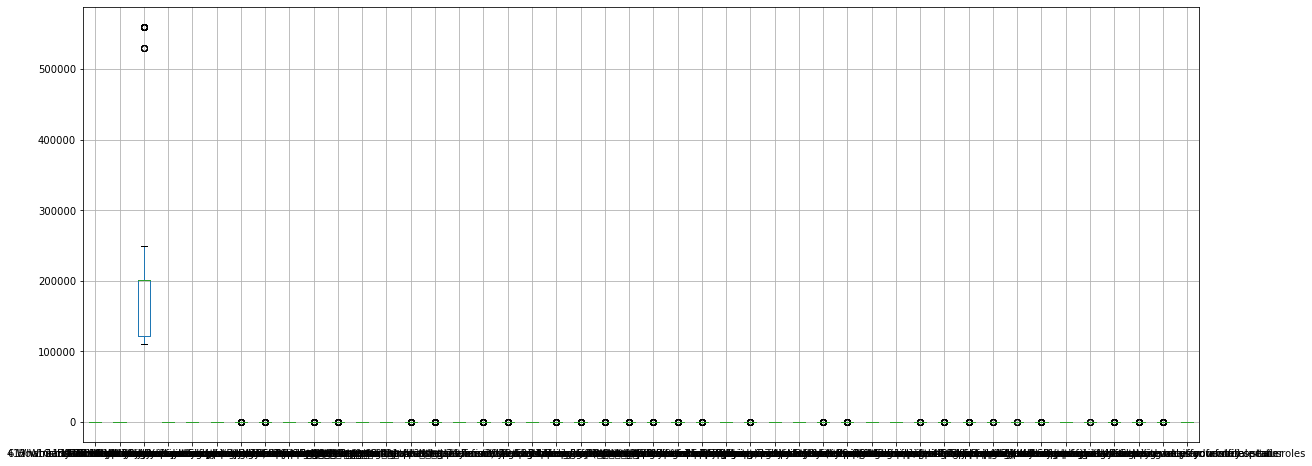

In [14]:
#Checking outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

There is negligible amount of outliers present in this data.

As, Skewness and outliers are not much present so will not handle them.

## Encoding data

In [15]:
# Encoding the data to obtin the value which are of object datatype
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [16]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [17]:
data

1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
5                        1                    3   
6                        0                    4   
7                        0                    4   
8                        1                    1   
9                        1                    3   
10                       0                    3   
11                       1                    4   
12                       1                    5   
13                       1                    3   
14                       1                    2   
15                       1                    2   
16                       0                    3   
17                       0                    4   
18                       1                    4   
19                       1                    2   
20                       1                    2   
21                       0                    3   
22                       0                    4   
23                       1                    4   
24                       1                    2   
25                       1                    2   
26                       0                    2   
27                       0                    3   
28                       1                    4   
29                       1                    4   
30                       1                    1   
31                       0                    3   
32                       0                    3   
33                       1                    4   
34                       1                    5   
35                       1                    2   
36                       0                    3   
37                       0                    4   
38                       1                    4   
39                       1                    2   
40                       1                    2   
41                       0                    3   
42                       0                    2   
43                       1                    2   
44                       1                    3   
45                       1                    4   
46                       0                    4   
47                       0                    1   
48                       1                    3   
49                       1                    3   
50                       1                    4   
51                       0                    5   
52                       0                    4   
53                       1                    4   
54                       1                    2   
55                       1                    2   
56                       0                    2   
57                       0                    2   
58                       1                    3   
59                       1                    4   
60                       1                    4   
61                       0                    1   
62                       0                    3   
63                       1                    3   
64                       1                    4   
65                       1                    5   
66                       0                    3   
67                       0                    4   
68                       1                    4   
69                       1                    2   
70                       1                    2   
71                       0                    3   
72                       0                    2   
73                       1                    2   
74                       1                    3   
75                       1                    4   
76                       0                    4   
77                       0 

## Visualizations

### Corelation of data

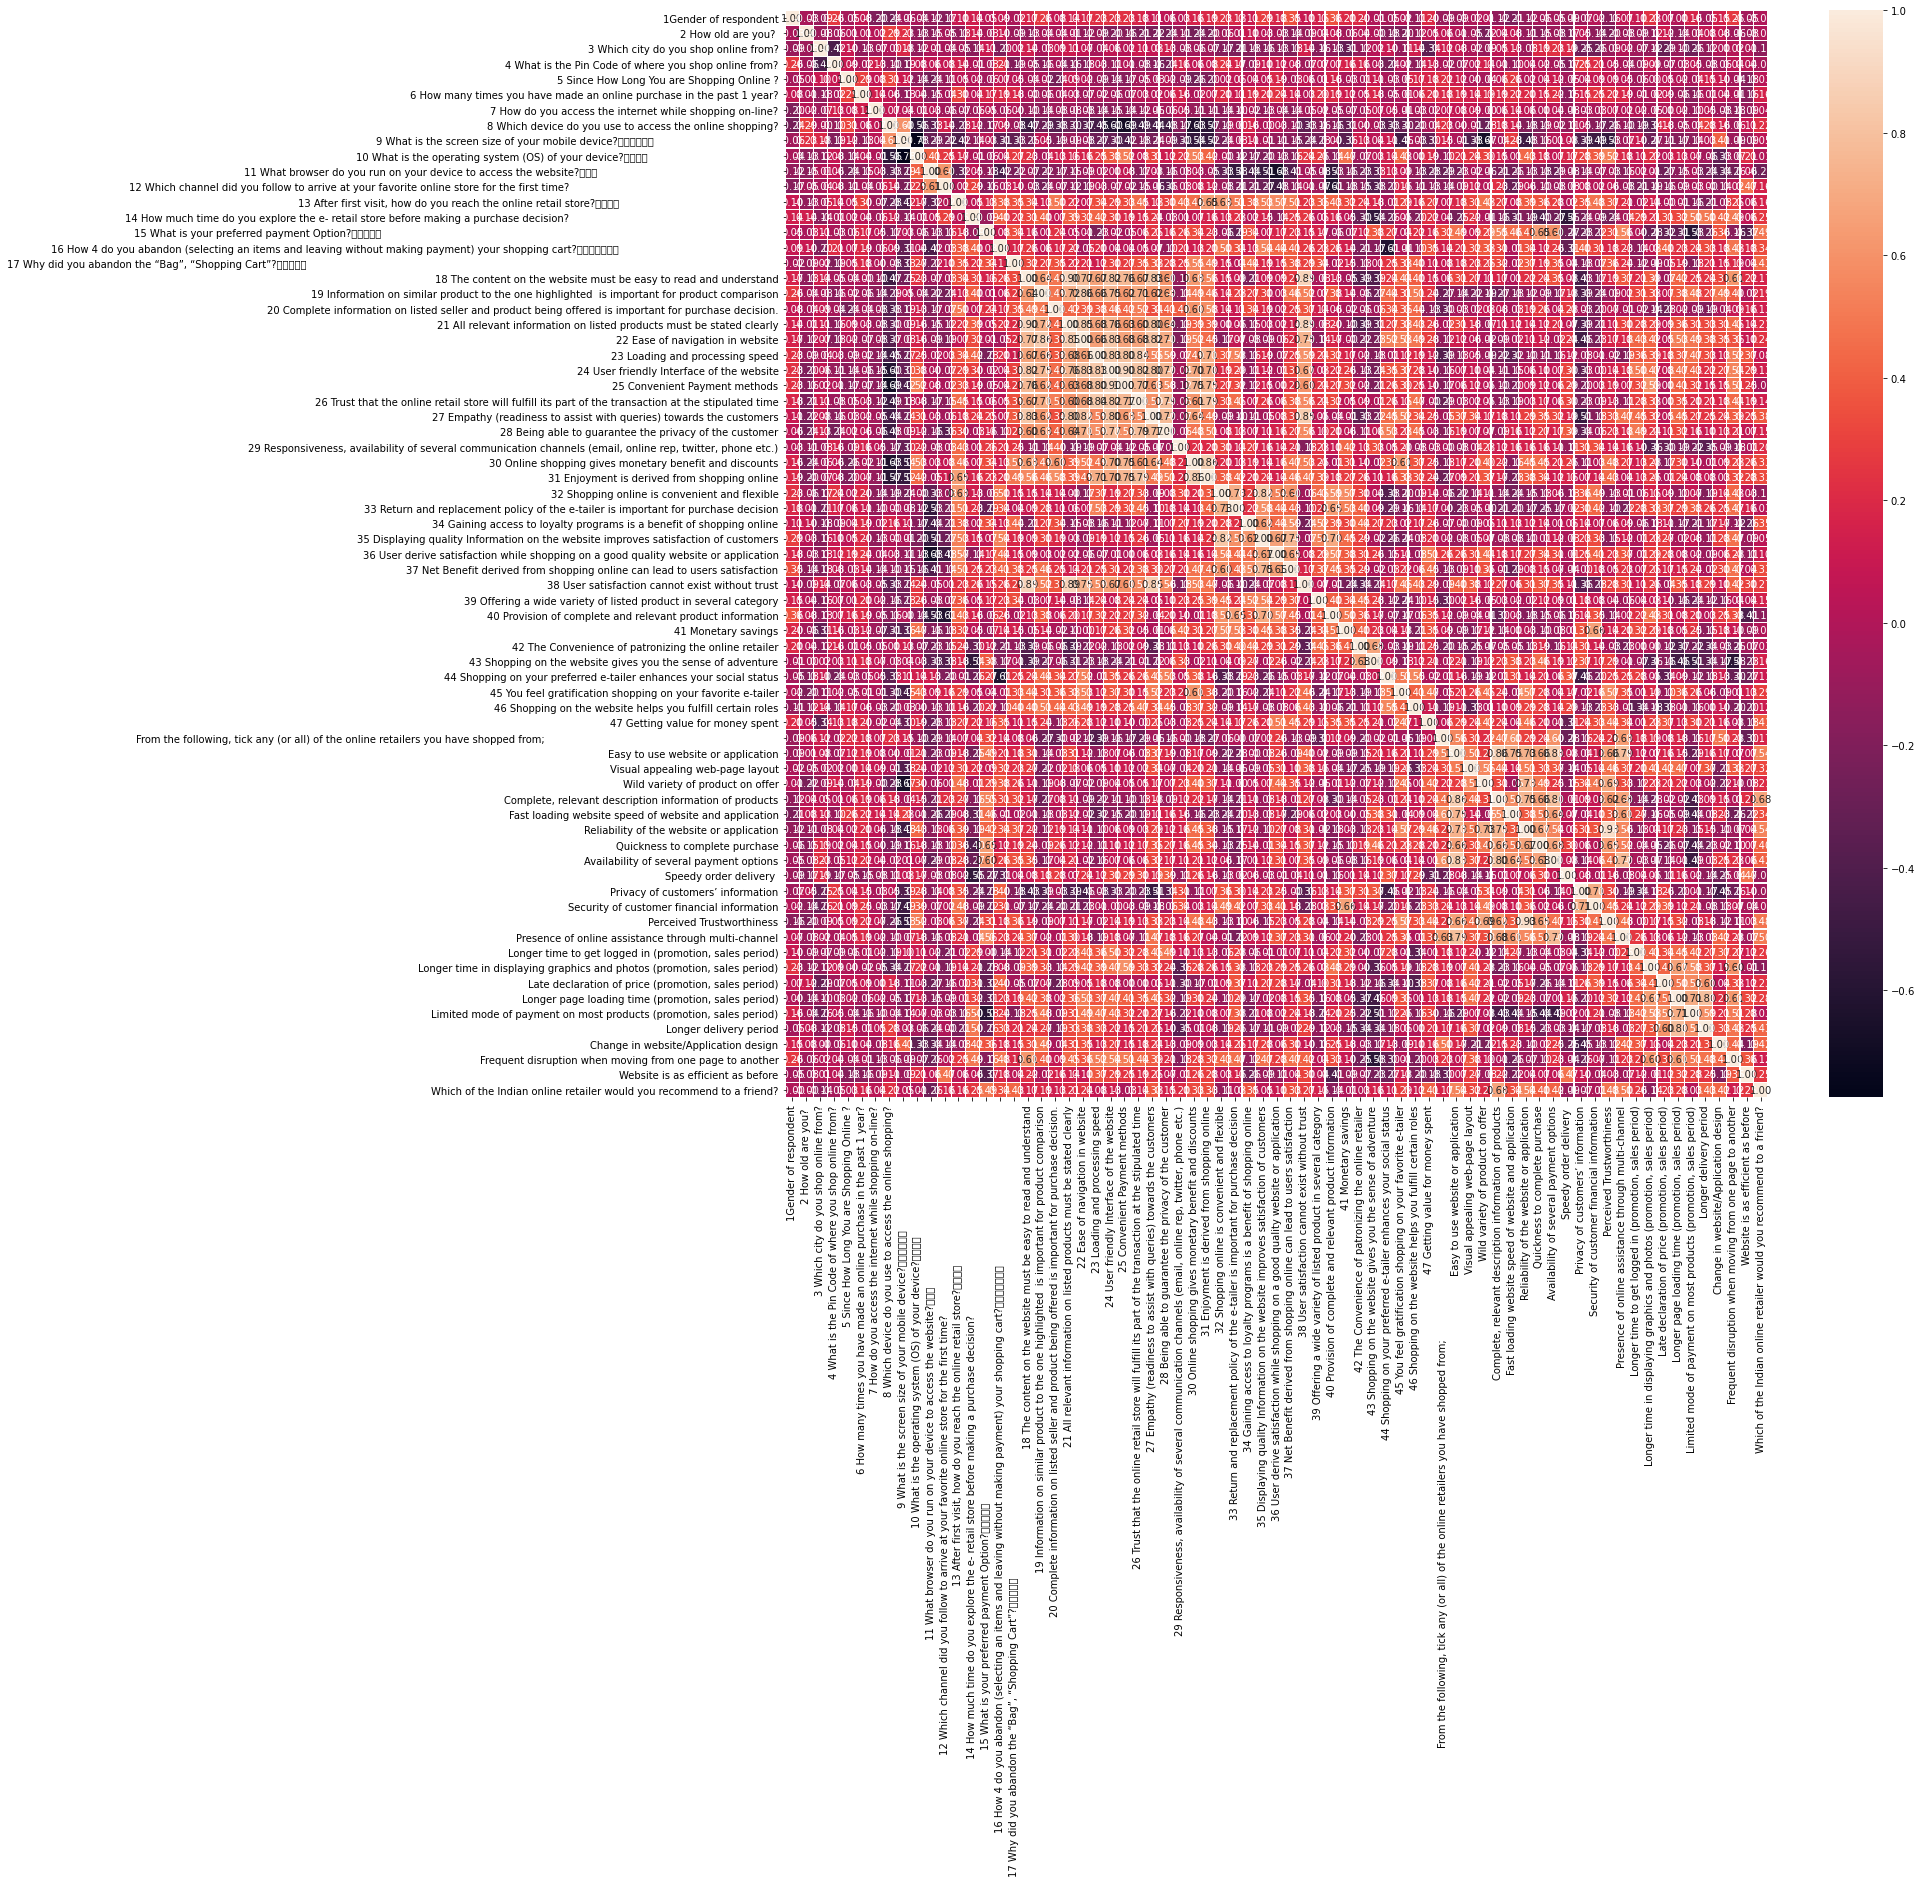

In [18]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [19]:
corr_matrix_hmap["Which of the Indian online retailer would you recommend to a friend?"].sort_values(ascending=False)

Which of the Indian online retailer would you recommend to a friend?                                                                                                                                                   1.000000
Complete, relevant description information of products                                                                                                                                                                 0.680926
Reliability of the website or application                                                                                                                                                                              0.542711
Easy to use website or application                                                                                                                                                                                     0.541713
Presence of online assistance through multi-channel                                                     

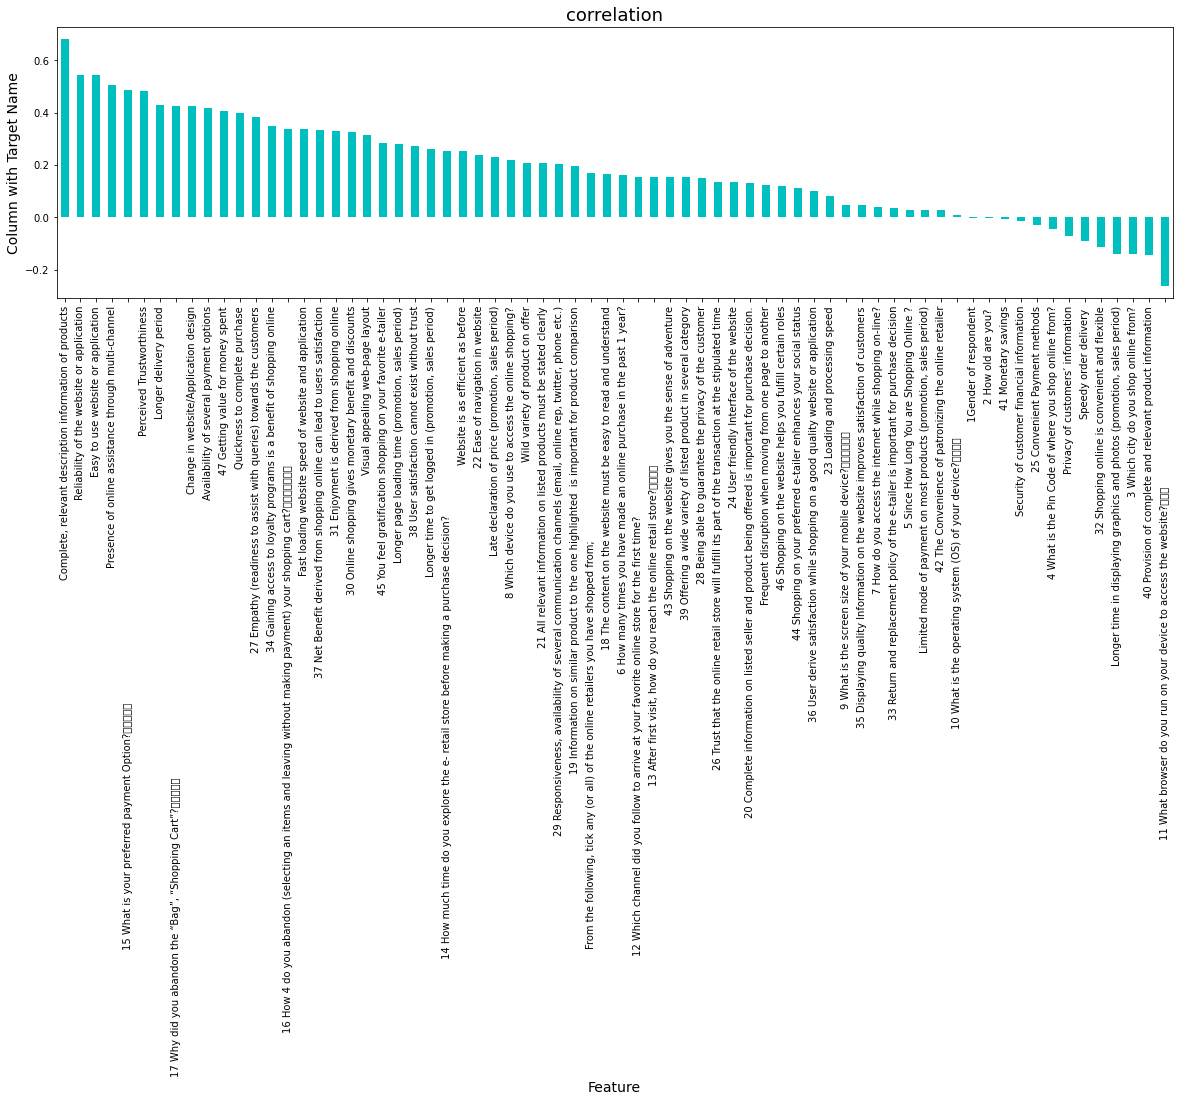

In [20]:
plt.figure(figsize=(20,5))
data.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values(ascending=False).drop(['Which of the Indian online retailer would you recommend to a friend?']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


The most correlated is Complete, relevant description information of products

The Least Corelated is What browser do you run on your device to access the website?

#### Plot of Which of the Indian online retailer would you recommend to a friend?

0.0    79
1.0    62
6.0    39
3.0    30
5.0    20
2.0    15
4.0    13
7.0    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


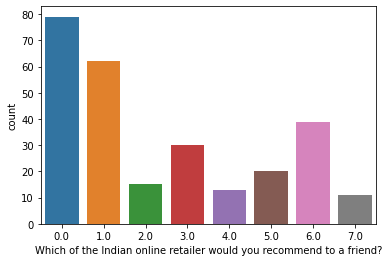

In [21]:
import seaborn as sns
alpha = sns.countplot(x="Which of the Indian online retailer would you recommend to a friend?",data=data)
print(data["Which of the Indian online retailer would you recommend to a friend?"].value_counts())

0.0 -> 
1.0 ->
2.0 ->
3.0 ->
4.0 ->
5.0 ->
6.0 ->
7.0 ->

#### Plot for maximum corelated attribute that is, Complete, relevant description information of products

1.0     100
0.0      43
4.0      24
7.0      20
5.0      15
2.0      15
3.0      14
10.0     12
9.0      11
8.0       8
6.0       7
Name: Complete, relevant description information of products, dtype: int64


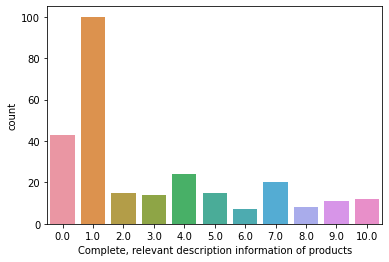

In [22]:
alpha = sns.countplot(x="Complete, relevant description information of products",data=data)
print(data["Complete, relevant description information of products"].value_counts())

0.0 ->
1.0 ->
2.0 ->
3.0 ->
4.0 ->
5.0 ->
6.0 ->
7.0 ->
8.0 ->
9.0 ->
10.0 ->

## Seperating Independent Variables and Target Variables

In [23]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
#y = data.iloc[:,-1]


## Scaling

In [24]:
data.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       3 Which city do you shop online from?  \
count                             269.000000   
mean                                4.494424   
std                                 3.187687   
min                                 0.000000   
25%                                 2.000000   
50%                                 4.000000   
75%                                 7.000000   
max                                10.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
c

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import warnings
# warnings.filterwarnings('ignore')
x=mms.fit_transform(x)

In [26]:
x

array([[0.        , 0.5       , 0.2       , ..., 0.33333333, 0.        ,
        0.        ],
       [1.        , 0.25      , 0.2       , ..., 0.        , 0.57142857,
        0.14285714],
       [1.        , 0.25      , 0.4       , ..., 0.83333333, 0.85714286,
        0.        ],
       ...,
       [1.        , 0.75      , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.71428571,
        0.71428571],
       [1.        , 0.75      , 0.3       , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
y

0      6.0
1      3.0
2      5.0
3      1.0
4      3.0
5      4.0
6      7.0
7      0.0
8      0.0
9      6.0
10     0.0
11     1.0
12     2.0
13     1.0
14     5.0
15     1.0
16     3.0
17     4.0
18     7.0
19     1.0
20     3.0
21     0.0
22     0.0
23     6.0
24     0.0
25     1.0
26     2.0
27     1.0
28     5.0
29     1.0
30     3.0
31     6.0
32     3.0
33     5.0
34     1.0
35     3.0
36     4.0
37     7.0
38     0.0
39     0.0
40     6.0
41     0.0
42     1.0
43     2.0
44     6.0
45     3.0
46     5.0
47     1.0
48     1.0
49     3.0
50     4.0
51     7.0
52     0.0
53     0.0
54     0.0
55     6.0
56     0.0
57     1.0
58     2.0
59     6.0
60     3.0
61     5.0
62     1.0
63     1.0
64     0.0
65     0.0
66     6.0
67     3.0
68     5.0
69     1.0
70     0.0
71     6.0
72     1.0
73     2.0
74     1.0
75     0.0
76     0.0
77     3.0
78     5.0
79     3.0
80     4.0
81     0.0
82     0.0
83     1.0
84     0.0
85     6.0
86     0.0
87     1.0
88     0.0
89     7.0
90     6.0

## Model Training

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [29]:
x_train.shape

(180, 70)

In [30]:
y_train.shape

(180,)

In [31]:
x_test.shape

(89, 70)

In [32]:
y_test.shape

(89,)

In [33]:
y_train

111    0.0
222    1.0
148    2.0
259    1.0
167    5.0
144    6.0
176    4.0
69     1.0
2      5.0
76     0.0
146    2.0
139    1.0
142    3.0
96     4.0
108    1.0
140    7.0
236    6.0
233    0.0
74     1.0
117    4.0
29     1.0
208    4.0
205    0.0
226    1.0
154    1.0
262    3.0
5      4.0
56     0.0
256    1.0
244    2.0
245    1.0
65     0.0
155    1.0
85     6.0
114    3.0
237    3.0
168    1.0
31     6.0
12     2.0
35     3.0
28     5.0
132    0.0
51     7.0
95     3.0
204    0.0
175    0.0
41     0.0
211    6.0
172    6.0
136    4.0
26     2.0
263    0.0
251    0.0
0      6.0
223    5.0
100    2.0
200    0.0
196    0.0
98     6.0
36     4.0
61     5.0
183    0.0
159    3.0
11     1.0
266    0.0
221    1.0
27     1.0
201    0.0
4      3.0
122    1.0
32     3.0
164    1.0
199    0.0
138    5.0
62     1.0
135    0.0
128    0.0
253    7.0
212    6.0
70     0.0
215    0.0
64     0.0
44     6.0
182    0.0
156    0.0
40     6.0
123    0.0
153    1.0
23     6.0
210    6.0
206    0.0

In [34]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [35]:
lm.fit(x_train,y_train)

LogisticRegression()

In [36]:
lm.score(x_train,y_train)

1.0

In [37]:
## Predictions

In [38]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [3. 3. 3. 6. 1. 0. 0. 3. 6. 6. 0. 0. 5. 0. 6. 3. 1. 6. 1. 3. 5. 3. 5. 1.
 0. 6. 0. 6. 7. 0. 6. 5. 0. 1. 0. 7. 1. 3. 6. 0. 1. 1. 5. 1. 3. 4. 6. 5.
 1. 3. 1. 2. 1. 2. 5. 5. 0. 1. 3. 6. 3. 0. 1. 0. 5. 6. 0. 3. 0. 2. 7. 1.
 1. 0. 6. 0. 6. 0. 0. 0. 2. 0. 3. 6. 0. 0. 0. 5. 4.]
Actual Allitation 30     3.0
116    3.0
79     3.0
127    6.0
190    1.0
137    0.0
202    0.0
45     3.0
173    6.0
239    6.0
179    0.0
267    0.0
220    5.0
82     0.0
186    6.0
185    3.0
241    1.0
265    6.0
104    1.0
60     3.0
261    5.0
184    3.0
46     5.0
42     1.0
181    0.0
9      6.0
22     0.0
193    6.0
109    7.0
24     0.0
113    6.0
68     5.0
143    0.0
217    1.0
197    0.0
6      7.0
120    1.0
67     3.0
119    6.0
118    0.0
25     1.0
125    1.0
165    5.0
19     1.0
77     3.0
209    4.0
90     6.0
170    5.0
93     1.0
258    3.0
15     1.0
150    2.0
224    1.0
242    2.0
115    5.0
33     5.0
180    0.0
141    1.0
248    3.0
250    6.0
16     3.0
75     0.0
147    

In [39]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 1.0


## Finding Best Random state


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  1.0 on Random_state 1


## Train Test Model Basedon Random State

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 1)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
accuracy_score_logistic_regression = accuracy_score(y_test,predrf)
print('Accuracy Score:', accuracy_score_logistic_regression)
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))


Accuracy Score: 1.0
Confusion Matrix: [[21  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  3]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         6
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
accuracy_score_decision_tree = accuracy_score(y_test,preddt)
print('Accuracy Score:', accuracy_score_decision_tree)
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))


Accuracy Score: 1.0
Confusion Matrix: [[21  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  3]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         6
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
accuracy_score_random_forest = accuracy_score(y_test,predrfc)
print('Accuracy Score:', accuracy_score_random_forest)
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))


Accuracy Score: 1.0
Confusion Matrix: [[21  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  3]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         6
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [45]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test,predsvm)
print('Accuracy Score:', accuracy_score_svm)
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))



Accuracy Score: 1.0
Confusion Matrix: [[21  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  3]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         6
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [46]:


pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 3 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 4 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 5 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 6 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 7 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 8 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 9 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 10 cv score is 1.0 and accuracy score training is 1.0 and accuracy for the testing is 1.0


At cross fold 11 cv score is 1.0 and accuracy score tr

In [47]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
cross_validation_logistic_regression = cv_mean
print("Cross validation score for Logistic Regression",cross_validation_logistic_regression)


Cross validation score for Logistic Regression 1.0


In [48]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
cross_validation_decision_tree = cv_mean
print("Cross validation score for Decision Tree",cross_validation_decision_tree)


Cross validation score for Decision Tree 1.0


In [49]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
cross_validation_random_forest = cv_mean
print("Cross validation score for Random Forest Classifier",cross_validation_random_forest)


Cross validation score for Random Forest Classifier 1.0


In [50]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
cross_validation_svm = cv_mean
print("Cross validation score for Support Vector Machhine",cross_validation_svm)


Cross validation score for Support Vector Machhine 1.0


### Least the diffrence between Accuracy and cross validation, Best the model

In [51]:
# Difference of logistic regression
# %Accuracyscore = accuracy - crossvalidation
result = accuracy_score_logistic_regression - cross_validation_logistic_regression
print("Accuracy of Logistic Regression",result)    

Accuracy of Logistic Regression 0.0


In [52]:
# Difference of Decision Tree
# %Accuracyscore = accuracy - crossvalidation
result = accuracy_score_decision_tree - cross_validation_decision_tree
print("Accuracy of Decision Tree",result)    

Accuracy of Decision Tree 0.0


In [53]:
# Difference of Random Forest
# %Accuracyscore = accuracy - crossvalidation
result = accuracy_score_random_forest - cross_validation_random_forest
print("Accuracy of Random Forest ",result)    

Accuracy of Random Forest  0.0


In [54]:
# Difference of SVM
# %Accuracyscore = accuracy - crossvalidation
result = accuracy_score_svm - cross_validation_svm
print("Accuracy of SVM ",result)    

Accuracy of SVM  0.0


#### Decision Tree and Random Forest shows max accuracy

## Regularization


To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [55]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [57]:
EN = ElasticNet(alpha=0.0001,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

1.0

In [58]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.9929672579976809

## Ensemble Technique

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 8}


In [60]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 100.0
Cross Validation Score: 100.0


## Saving Model

In [61]:
import pickle
filename = "Customer_Activation_Retension.pkl"
pickle.dump(rf,open(filename,"wb"))


## Conclusion

In [62]:
loaded_model=pickle.load(open('Customer_Activation_Retension.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

1.0


In [63]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

0    1    2    3    4    5    6    7    8    9    10   11   12  \
Predicted  2.0  0.0  7.0  1.0  3.0  4.0  1.0  2.0  0.0  0.0  1.0  1.0  6.0   
Original   2.0  0.0  7.0  1.0  3.0  4.0  1.0  2.0  0.0  0.0  1.0  1.0  6.0   

            13   14   15   16   17   18   19   20   21   22   23   24   25  \
Predicted  3.0  6.0  0.0  3.0  6.0  0.0  0.0  6.0  0.0  6.0  0.0  2.0  0.0   
Original   3.0  6.0  0.0  3.0  6.0  0.0  0.0  6.0  0.0  6.0  0.0  2.0  0.0   

            26   27   28   29   30   31   32   33   34   35   36   37   38  \
Predicted  6.0  6.0  6.0  1.0  1.0  0.0  0.0  5.0  0.0  0.0  1.0  0.0  1.0   
Original   6.0  6.0  6.0  1.0  1.0  0.0  0.0  5.0  0.0  0.0  1.0  0.0  1.0   

            39   40   41   42   43   44   45   46   47   48   49   50   51  \
Predicted  3.0  0.0  0.0  1.0  1.0  6.0  0.0  1.0  1.0  2.0  4.0  1.0  6.0   
Original   3.0  0.0  0.0  1.0  1.0  6.0  0.0  1.0  1.0  2.0  4.0  1.0  6.0   

            52   53   54   55   56   57   58   59   60   61   62   63   64  \
Predicted  6.0  1.0  0.0  6.0  1.0  6.0  7.0  0.0  3.0  0.0  3.0  5.0  1.0   
Original   6.0  1.0  0.0  6.0  1.0  6.0  7.0  0.0  3.0  0.0  3.0  5.0  1.0   

            65   66   67   68   69   70   71   72   73   74   75   76   77  \
Predicted  1.0  5.0  1.0  3.0  6.0  1.0  6.0  1.0  1.0  3.0  3.0  5.0  3.0   
Original   1.0  5.0  1.0  3.0  6.0  1.0  6.0  1.0  1.0  3.0  3.0  5.0  3.0   

            78   79   80   81   82   83   84   85   86   87   88  
Predicted  2.0  5.0  6.0  7.0  1.0  5.0  3.0  6.0  0.0  1.0  1.0  
Original   2.0  5.0  6.0  7.0  1.0  5.0  3.0  6.0  0.0  1.0  1.0

## Our model shows 100% accuracy, which predicts Customer Activation and Retention